<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_3/blob/main/Semana4_Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 1. Julio Osvaldo Hernandez Bucio. A01794366. Ciencia y Analitica de Datos. Jobish. 08/10/22.**

# **Descripcion**

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Supóngase que existe una muestra con n individuos cada uno con p variables (X1, X2, …, Xp), es decir, el espacio muestral tiene p dimensiones. PCA permite encontrar un número de factores subyacentes (z<p) que explican aproximadamente lo mismo que las p variables originales. Donde antes se necesitaban p valores para caracterizar a cada individuo, ahora bastan z valores. Cada una de estas z nuevas variables recibe el nombre de componente principal.

Fuente:

Amat Rodrigo, J. (2017, junio). Análisis de Componentes Principales y t-SNE. Ciencia de Datos. https://www.cienciadedatos.net/documentos/35_principal_component_analysis

# **Implementacion**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url="https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
x = pd.read_csv(url)
df  = pd.DataFrame(data = x)
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
df.to_csv('data.csv')
df = pd.read_csv('/content/data.csv', index_col=0)
df.index.name = None
df.iloc[:10, 6:]

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [ ]:
df.X18.mean().round(2)

5662.95

In [ ]:
df.X19.mean().round(2)

5922.49

In [ ]:
df.X20.mean().round(2)

5225.62

# **Normalization**

In [ ]:
def normalize(x):
  min = np.min(x)
  max = np.max(x)
  range = max - min
  return [((a-min) / range).round(6) for a in x]

In [ ]:
df['X6'] = normalize(df.X6)
df['X7'] = normalize(df.X7)
df['X8'] = normalize(df.X8)
df['X9'] = normalize(df.X9)
df['X10'] = normalize(df.X10)
df['X11'] = normalize(df.X11)
df['X12'] = normalize(df.X12)
df['X13'] = normalize(df.X13)
df['X14'] = normalize(df.X14)
df['X15'] = normalize(df.X15)
df['X16'] = normalize(df.X16)
df['X17'] = normalize(df.X17)
df['X18'] = normalize(df.X18)
df['X19'] = normalize(df.X19)
df['X20'] = normalize(df.X20)
df['X21'] = normalize(df.X21)
df['X22'] = normalize(df.X22)
df['X23'] = normalize(df.X23)

Empezamos a trabajar en la muestra pequeña para comparar solo tres componentes

In [ ]:
df1 = df.head(20)

varX = df1.X18
varY = df1.X19
varZ = df1.X20

In [ ]:
X = varX.copy()
Y = varY.copy()
Z = varZ.copy()

normalizedValuesX = normalize(X)
normalizedValuesY = normalize(Y)
normalizedValuesZ = normalize(Z)

print(normalizedValuesX)
print(normalizedValuesY)
print(normalizedValuesZ)

[0.0, 0.0, 0.027604, 0.036372, 0.036372, 0.045457, 1.0, 0.006909, 0.06053, 0.0, 0.041931, 0.39669, 0.018186, 0.058179, 0.054542, 0.0, 0.058179, 0.188323, 0.0, 0.0]
[0.017222, 0.025012, 0.037517, 0.050486, 0.917049, 0.045391, 1.0, 0.015032, 0.0, 0.0, 0.000295, 0.249147, 0.162491, 0.0, 0.074993, 0.037517, 0.0, 0.249989, 0.0, 0.0]
[0.0, 0.013168, 0.013168, 0.015799, 0.13168, 0.008649, 0.500395, 0.0, 0.005687, 0.0, 0.000661, 0.113025, 0.085592, 0.039504, 0.039504, 0.01449, 0.019752, 1.0, 0.0, 0.0]


In [ ]:
df1['X18'] = normalizedValuesX
df1['X19'] = normalizedValuesY
df1['X20'] = normalizedValuesZ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df.iloc[:, 6:]

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.017222,0.000000,0.000000,0.000000,0.000000,1.0
1,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.025012,0.013168,0.001610,0.000000,0.003783,1.0
2,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.027604,0.037517,0.013168,0.001610,0.002345,0.009458,0.0
3,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.036372,0.050486,0.015799,0.001771,0.002506,0.001892,0.0
4,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.036372,0.917049,0.131680,0.014493,0.001615,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0.0
29996,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0.0
29997,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0
29998,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1.0


In [ ]:
df1.loc[:, ['X18', 'X19', 'X20']]

,X18,X19,X20
0,0.000000,0.017222,0.000000
1,0.000000,0.025012,0.013168
2,0.027604,0.037517,0.013168
3,0.036372,0.050486,0.015799
4,0.036372,0.917049,0.131680
5,0.045457,0.045391,0.008649
6,1.000000,1.000000,0.500395
7,0.006909,0.015032,0.000000
8,0.060530,0.000000,0.005687
9,0.000000,0.000000,0.000000


In [ ]:
ndf = df1[['X18', 'X19', 'X20']]
ndf.corr()

,X18,X19,X20
X18,1.000000,0.709901,0.518673
X19,0.709901,1.000000,0.478254
X20,0.518673,0.478254,1.000000


In [ ]:
Variance = np.cov([df1.X18, df1.X19, df1.X20])
Variance

array([[0.05305   , 0.0473122 , 0.02864047],
       [0.0473122 , 0.08372687, 0.03317683],
       [0.02864047, 0.03317683, 0.05747609]])

In [ ]:
ndf = df1[['X18', 'X19', 'X20']]
ndf.var().sum()

0.19425296265828157

In [ ]:
t= ndf.var().sum()
varC =Variance[0][0]
varR = Variance[1][1]
varX = Variance[2][2]

In [ ]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of Previous Payment Sep \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of Previous Payment Aug \t:', ((varR/t)*100).round(2),'%' )
print('Varience prop. of Previous Payment Jul \t:', ((varX/t)*100).round(2),'%' )

Total Varience 			: 0.19
Varience prop. of Previous Payment Sep 	: 27.31 %
Varience prop. of Previous Payment Aug 	: 43.1 %
Varience prop. of Previous Payment Jul 	: 29.59 %


In [ ]:
import seaborn as sns

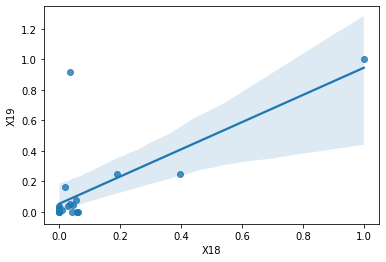

In [ ]:
p = sns.regplot(data = df1,
                x = df1.X18,
                y = df1.X19)
p

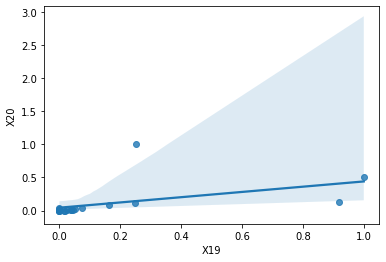

In [ ]:
p = sns.regplot(data = df1,
                x = df1.X19,
                y = df1.X20)
p

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pcs = PCA(n_components=3)

pcs.fit(df1[['X18', 'X19', 'X20']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,0.375493,0.725833,0.725833
1,0.187776,0.181515,0.907348
2,0.134156,0.092652,1.000000


In [ ]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2
Standard deviation,0.38,0.19,0.13
Proportion of variance,0.73,0.18,0.09
Cumulative proportion,0.73,0.91,1.00


In [ ]:
pcsSummary.columns = ['PC1', 'PC2', 'PC3']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2,PC3
Standard deviation,0.3755,0.1878,0.1342
Proportion of variance,0.7258,0.1815,0.0927
Cumulative proportion,0.7258,0.9073,1.0000


# Scree plot

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

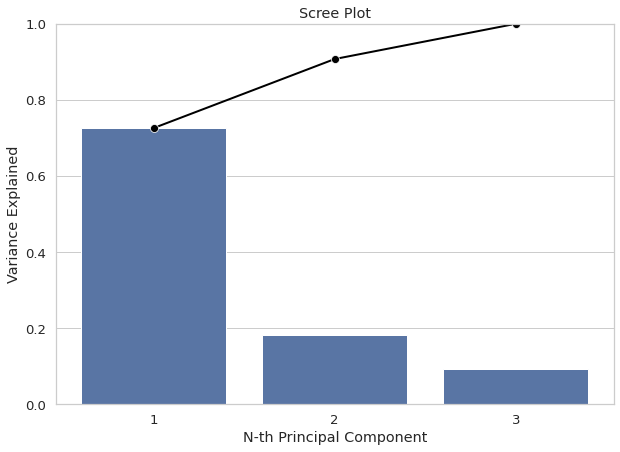

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 0.5321,  0.7083,  0.4638],
       [-0.1146, -0.4826,  0.8683],
       [-0.8389,  0.5152,  0.1756]])

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2', 'PC3'],
                                index=['X18', 'X19', 'X20']
                                )
pcsComponents_df

,PC1,PC2,PC3
X18,0.532110,-0.114552,-0.838890
X19,0.708315,-0.482572,0.515183
X20,0.463840,0.868333,0.175643


In [ ]:
scores = pd.DataFrame(pcs.transform(df1[['X18', 'X19', 'X20']]),
                      columns=['x', 'y', 'z']
                      )
scores.head()

,x,y,z
0,-0.190273,-0.014026,0.002174
1,-0.178648,-0.006351,0.008500
2,-0.155102,-0.015548,-0.008214
3,-0.140030,-0.020526,-0.008426
4,0.527520,-0.338082,0.458366


In [ ]:
x = (0.532112)*(0-5662.95) + (-0.0114581)*(1000-5922.49) + (-0.83885)*(1000 - 5225.56) 
y = (0.708311)*(0-5662.95) + (-0.482562)*(1000-5922.49) + (-0.515199)*(1000 - 5225.56) 
z = (0.463846)*(0-5662.95) + (0.868335)*(1000-5922.49) + (0.175618)*(1000 - 5225.56) 

In [ ]:
print('For the PC1\n \t x = ', x, '\n\t y = ', y, '\n\t z = ', z)

For the PC1
 	 x =  587.6897382689999 
	 y =  541.2811283700003 
	 z =  -7643.191455929999


In [ ]:
scores.x.mean()

-5.551115123125783e-18

In [ ]:
scores.y.sum()

5.204170427930421e-17

In [ ]:
scores.x.var() + scores.y.var()

0.1762551336753205

In [ ]:
df1.X18.var() + df1.X19.var() + df1.X20.var()

0.19425296265828157

In [ ]:
((scores.x.var()/
  (scores.x.var()+scores.y.var()+scores.z.var())
 )*100).round(0)

73.0

In [ ]:
pcs = PCA()
pcs.fit(df.iloc[:, 6:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Standard deviation,0.423043,0.232506,0.125796,0.094804,0.073509,0.060253,0.051870,0.042553,0.037601,0.033234,0.031775,0.024477,0.022307,0.018948,0.015959,0.012856,0.010693,0.008630,0.006915
Proportion of variance,0.646056,0.195150,0.057126,0.032446,0.019507,0.013106,0.009713,0.006537,0.005104,0.003987,0.003645,0.002163,0.001796,0.001296,0.000919,0.000597,0.000413,0.000269,0.000173
Cumulative proportion,0.646056,0.841205,0.898332,0.930777,0.950284,0.963389,0.973102,0.979639,0.984743,0.988730,0.992375,0.994537,0.996334,0.997630,0.998549,0.999146,0.999559,0.999827,1.000000


# **Scree Plot**

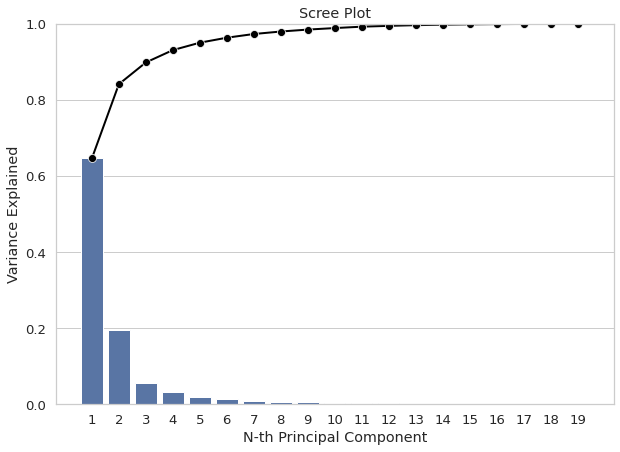

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
((pcsSummary_df.iloc[1][0])*100).round(0)

65.0

In [ ]:
((pcsSummary_df.iloc[2][1])*100).round(2)

84.12

# **Paso 1. Número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.**

Acumulada se refiere a la proporción acumulada de la variabilidad de la muestra explicada por los componentes principales consecutivos. 

La proporción acumulada es utilizada para evaluar la cantidad total de varianza que explican los componentes principales consecutivos. La proporción acumulada puede ayudarle a determinar el número de componentes principales que se usará. Conserve los componentes principales que explican un nivel aceptable de varianza. El nivel aceptable depende de su aplicación.

In [ ]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Standard deviation,0.4230,0.2325,0.1258,0.0948,0.0735,0.0603,0.0519,0.0426,0.0376,0.0332,0.0318,0.0245,0.0223,0.0189,0.0160,0.0129,0.0107,0.0086,0.0069
Proportion of variance,0.6461,0.1951,0.0571,0.0324,0.0195,0.0131,0.0097,0.0065,0.0051,0.0040,0.0036,0.0022,0.0018,0.0013,0.0009,0.0006,0.0004,0.0003,0.0002
Cumulative proportion,0.6461,0.8412,0.8983,0.9308,0.9503,0.9634,0.9731,0.9796,0.9847,0.9887,0.9924,0.9945,0.9963,0.9976,0.9985,0.9991,0.9996,0.9998,1.0000


Para este caso en particular donde se toman las columnas X6-X23, la proporción acumulada de la varianza explica que los primeros 5 componentes contienen mas del 93% de la varianza en los datos

# **Paso 2. Interpretacion de cada componente principal en términos de las variables originales**

Los componentes principales son las combinaciones lineales de las variables originales que explican la varianza en los datos. El número máximo de componentes extraídos siempre es igual al número de variables. Los vectores propios, compuestos por los coeficientes que corresponden a cada variable, se utilizan para calcular las puntuaciones de los componentes principales. Los coeficientes indican la ponderación relativa de cada variable en el componente.

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 6:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
X6,0.108704,0.290789,-0.072717,-0.591510,-0.652994
X7,0.102973,0.391252,-0.098552,-0.460213,0.233290
X8,0.095909,0.415076,-0.124605,-0.144018,0.561825
X9,0.088772,0.417232,-0.120543,0.220465,0.182775
X10,0.082094,0.400394,-0.091136,0.392662,-0.175875
X11,0.076960,0.386241,-0.063032,0.455125,-0.367410
X12,0.002333,0.106508,0.448327,-0.050880,0.023643
X13,0.003621,0.116153,0.471101,-0.037198,0.038483
X14,0.002070,0.065904,0.261478,-0.004468,0.014654
X15,0.003994,0.107485,0.419215,0.014805,0.002099


In [ ]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 6:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
X6,0.108704,0.290789,-0.072717,-0.591510,-0.652994,-0.308433,-0.154939,-0.031371,0.040012,0.005328,0.013569,0.003558,0.009619,0.000497,0.002670,-0.001995,-0.000450,-0.000979,-0.000168
X7,0.102973,0.391252,-0.098552,-0.460213,0.233290,0.579943,0.456684,0.110084,0.016004,-0.026918,0.028429,-0.011127,0.027318,-0.022055,-0.013669,-0.005231,-0.001641,0.000439,-0.003150
X8,0.095909,0.415076,-0.124605,-0.144018,0.561825,-0.120126,-0.619743,-0.256613,0.010663,-0.005125,0.010115,0.001596,-0.025754,0.016798,0.030644,0.008270,-0.004966,-0.000959,0.003540
X9,0.088772,0.417232,-0.120543,0.220465,0.182775,-0.570166,0.317469,0.541051,0.005750,-0.010031,0.007006,-0.007861,0.016335,0.036831,-0.030844,0.005232,0.002741,0.005250,-0.000950
X10,0.082094,0.400394,-0.091136,0.392662,-0.175875,-0.059583,0.353939,-0.708574,-0.011101,0.008698,-0.002232,0.082004,-0.021618,-0.032421,0.011210,0.001904,0.003543,-0.005934,-0.000522
X11,0.076960,0.386241,-0.063032,0.455125,-0.367410,0.470687,-0.389307,0.338987,-0.001844,0.064716,-0.059683,-0.048553,0.020192,0.009440,0.004659,-0.011198,-0.003232,0.002997,0.000747
X12,0.002333,0.106508,0.448327,-0.050880,0.023643,-0.005924,0.030945,0.007867,-0.188782,0.353108,-0.324613,0.233538,-0.109069,0.372082,0.148742,0.308005,-0.430373,-0.053085,-0.088556
X13,0.003621,0.116153,0.471101,-0.037198,0.038483,-0.029744,-0.008355,-0.006541,-0.181724,0.275730,-0.234486,0.106805,0.218806,-0.240128,-0.299278,-0.170083,0.500217,0.105667,0.315975
X14,0.002070,0.065904,0.261478,-0.004468,0.014654,-0.025587,0.010079,0.010576,-0.031996,0.031106,-0.020683,-0.110134,0.090618,-0.244683,0.472424,-0.153259,0.257600,-0.015999,-0.728191
X15,0.003994,0.107485,0.419215,0.014805,0.002099,-0.020585,0.011691,-0.035813,0.001416,-0.187890,0.207892,-0.393681,0.101791,0.162059,0.098722,-0.542418,-0.316596,-0.283246,0.236782


**Analisis de la magnitud y la dirección de los coeficientes de las variables originales**

En estos resultados, el segundo componente principal tiene asociaciones positivas grandes con el el estado de pago de julio a abril(X6-X11), y los primeros meses para el estado de cuenta. Se puede interpretar este componente principalmente como una medición de la estabilidad financiera a largo plazo del cliente. El tercer componente tiene asociaciones positivas grandes con los estados de cuenta, así que este componente mide principalmente el balance financiero del cliente .

In [ ]:
pcsSummary_df.iloc[2,6]

0.973101979360351

# **Paso 3. Valores atipicos**

**Error de reconstruccion**

La detección de anomalías (outliers) con Análisis de Componentes Principales (PCA) es una estrategia no supervisada para identificar anomalías cuando los datos no están etiquetados, es decir, no se conoce la clasificación real (anomalía - no anomalía) de las observaciones.

El método PCA crea una función que mapea la posición que ocupa cada observación en el espacio original con el que ocupa en el nuevo espacio generado. Este mapeo funciona en ambas direcciones, por lo que también se puede ir desde el nuevo espacio al espacio original. Solo aquellas observaciones que hayan sido bien proyectadas podrán volver a la posición que ocupaban en el espacio original con una precisión elevada.

Dado que la búsqueda de ese nuevo espacio ha sido guiada por la mayoría de las observaciones, serán las observaciones más próximas al promedio las que mejor puedan ser proyectadas y en consecuencia mejor reconstruidas. Las observaciones anómalas, por el contrario, serán mal proyectadas y su reconstrucción será peor. Es este error de reconstrucción (elevado al cuadrado) el que puede emplearse para identificar anomalías.

<Figure size 432x288 with 0 Axes>

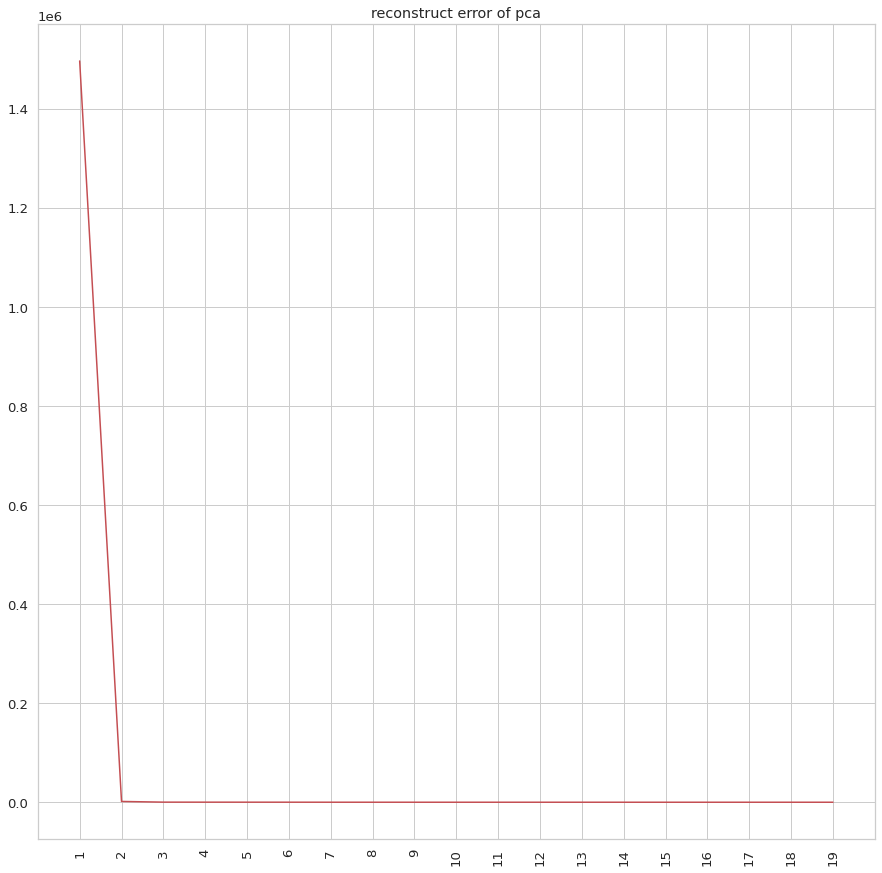

In [ ]:
from numpy import linalg as LA
max_comp=20
start=1
error_record=[]
for i in range(start,max_comp):
    pca = PCA(n_components=i, random_state=42)
    pca2_results = pca.fit_transform(df.dropna(axis=0))
    pca2_proj_back=pca.inverse_transform(pca2_results)
    total_loss=LA.norm((df.dropna(axis=0)-pca2_proj_back),None)
    error_record.append(total_loss)

plt.clf()
plt.figure(figsize=(15,15))
plt.title("reconstruct error of pca")
plt.plot(error_record,'r')
plt.xticks(range(len(error_record)), range(start,max_comp), rotation='vertical')
plt.xlim([-1, len(error_record)])
plt.show()